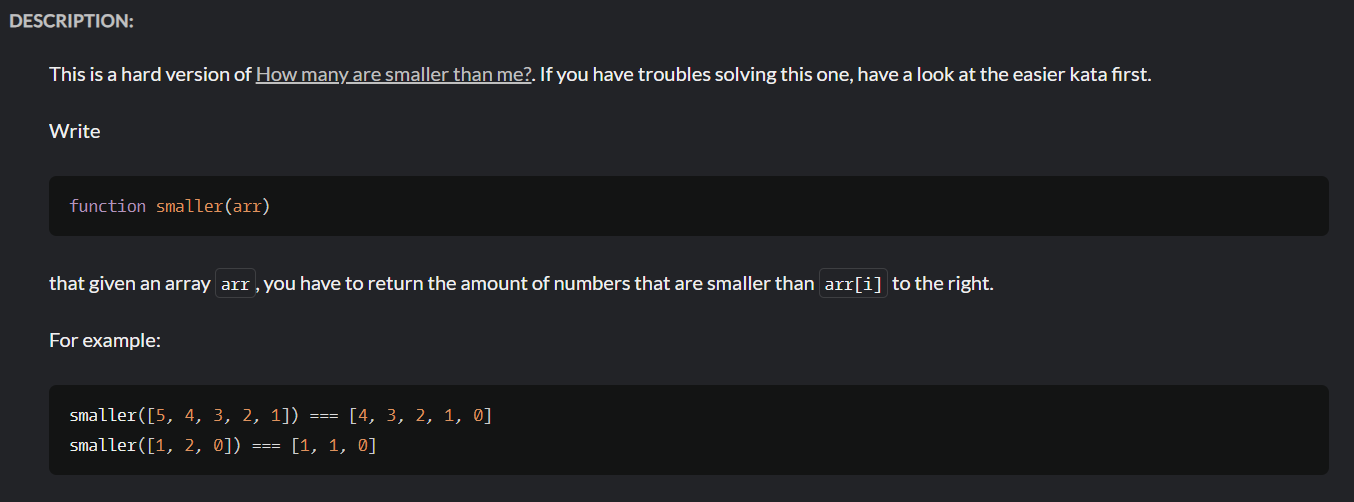

In [ ]:
def smaller(array):
    check_if_correct_argument(array)
    current_number = 0
    smaller_array = []
    for number in array:
        smaller_array.append(len([num for num in array[current_number + 1:] if num < number]))
    return smaller_array

In [ ]:
def check_if_correct_argument(array):
    if not isinstance(array, list):
        raise TypeError("An array has to be of type list")
    if not all(isinstance(obj, int) for obj in array):
        raise TypeError("All elements in the array must be integers")

In [ ]:
test_list = []
x, numbers = 30000, 30000
for i in range(numbers):
  test_list.append(x)
  x = x - 1
a = smaller(test_list)

In [ ]:
smaller([5, 4, 3, 2, 1])

[4, 3, 2, 1, 0]

In [ ]:
smaller([1, 2, 0])

[1, 1, 0]

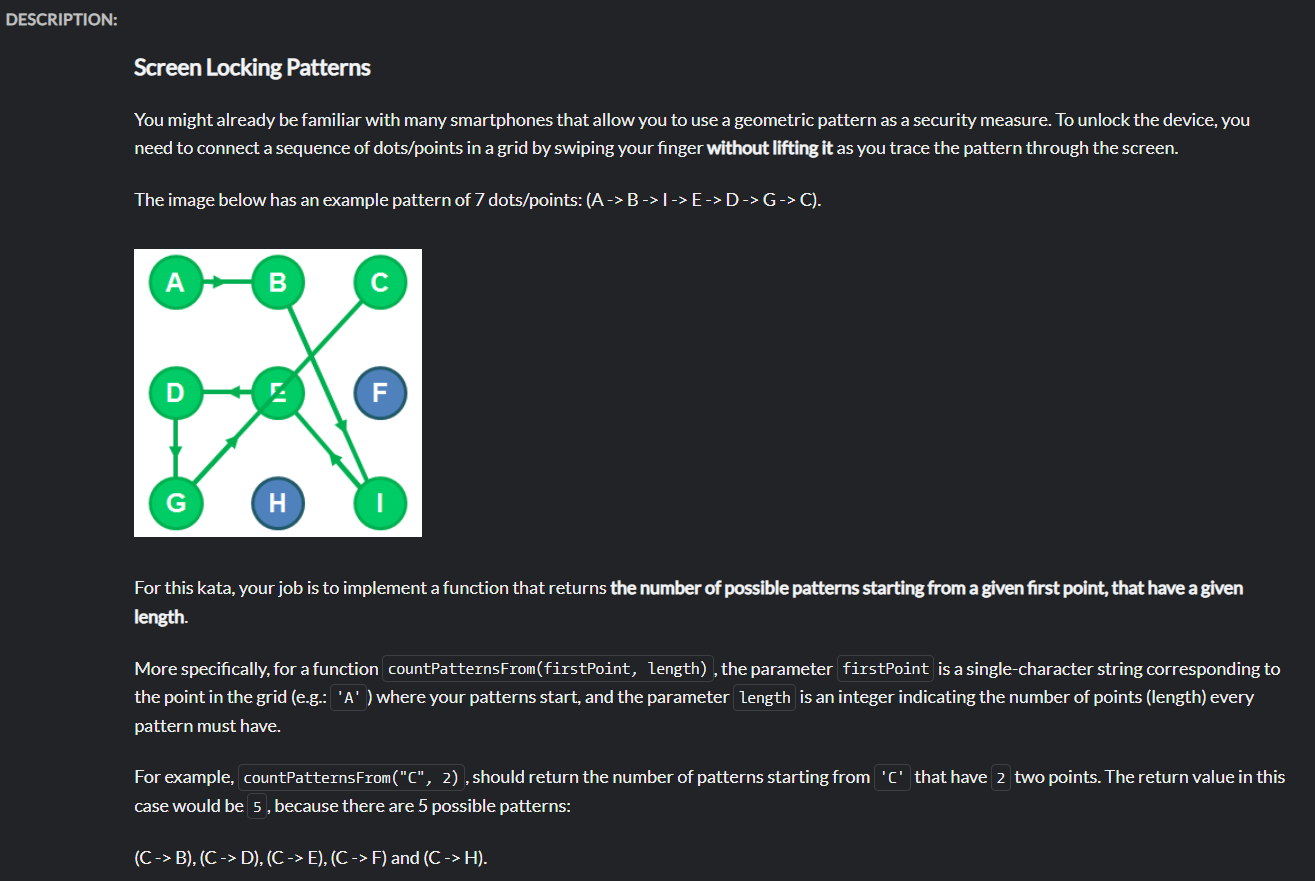

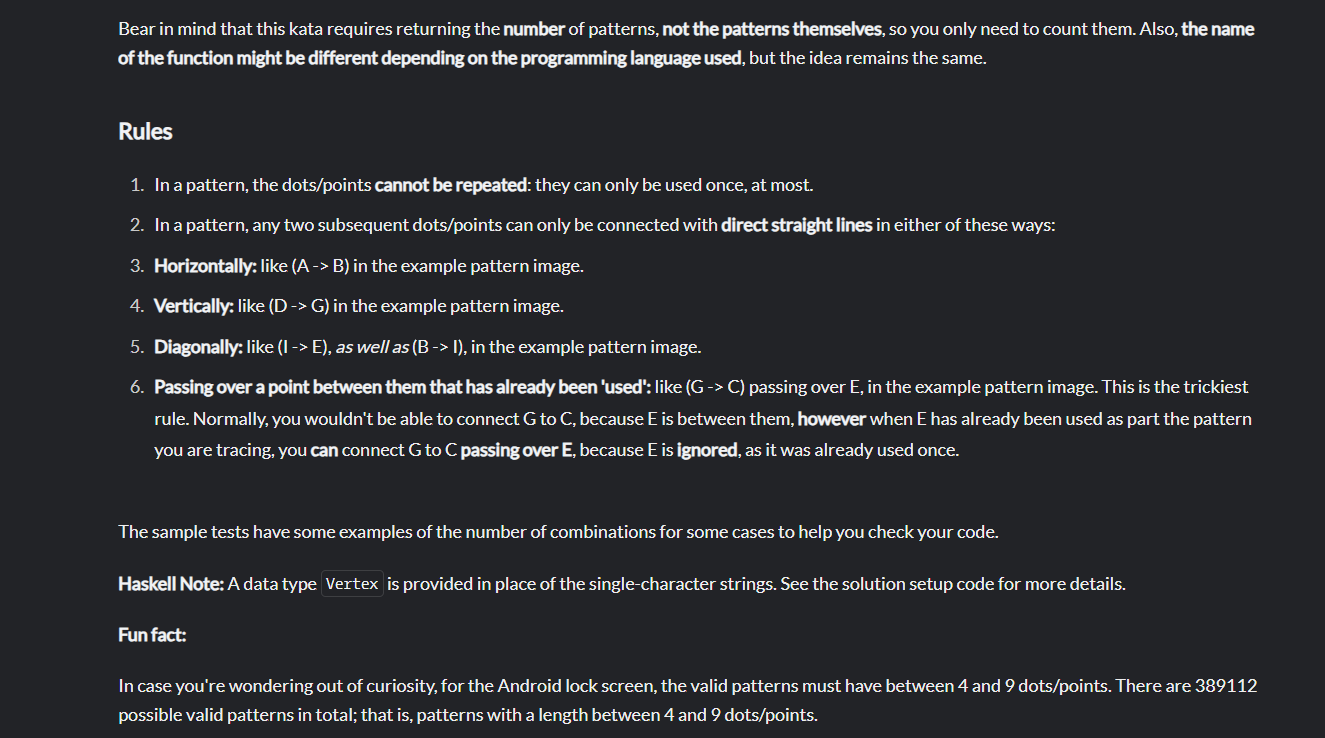

In [ ]:
vertices = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]

In [ ]:
def possible_next_moves(current_state):
    blocked_vertices = {
        "A":{"G":"D", "C":"B", "I":"E"},
        "B":{"H":"E"},
        "C":{"A":"B", "G":"E", "I":"F"},
        "D":{"F":"E"},
        "E":{},
        "F":{"D":"E"},
        "G":{"A":"D", "C":"E", "I":"H"},
        "H":{"B":"E"},
        "I":{"C":"F", "G":"H", "A":"E"}
        }
    current_vertex = current_state[-1:]
    previous_moves = current_state[:len(current_state) - 1]
    possible = vertices.copy()
    for vertex in current_state:
        if vertex in possible:
            possible.remove(vertex)
    for blocked, blocked_by in blocked_vertices.get(current_vertex).items():
        if blocked_by in possible and blocked in possible:
            possible.remove(blocked)
    return possible

In [ ]:
def create_combinations(current_state, length, combinations):
    if len(current_state) < length:
        for vertex in possible_next_moves(current_state):
            create_combinations(current_state + vertex, length, combinations)
    else:
        combinations.append(current_state)

In [ ]:
def countPatternsFrom(firstPoint, length):
    combinations = []
    create_combinations(firstPoint, length, combinations)
    return len(combinations)

In [ ]:
def precise_check():
    all_combinations_number = 0
    for length in range(4, 10):
        for vertex in vertices:
            num = countPatternsFrom(vertex, length)
            all_combinations_number += num
    return all_combinations_number

In [ ]:
print(countPatternsFrom("C", 2))

5


In [ ]:
print(precise_check())

389112


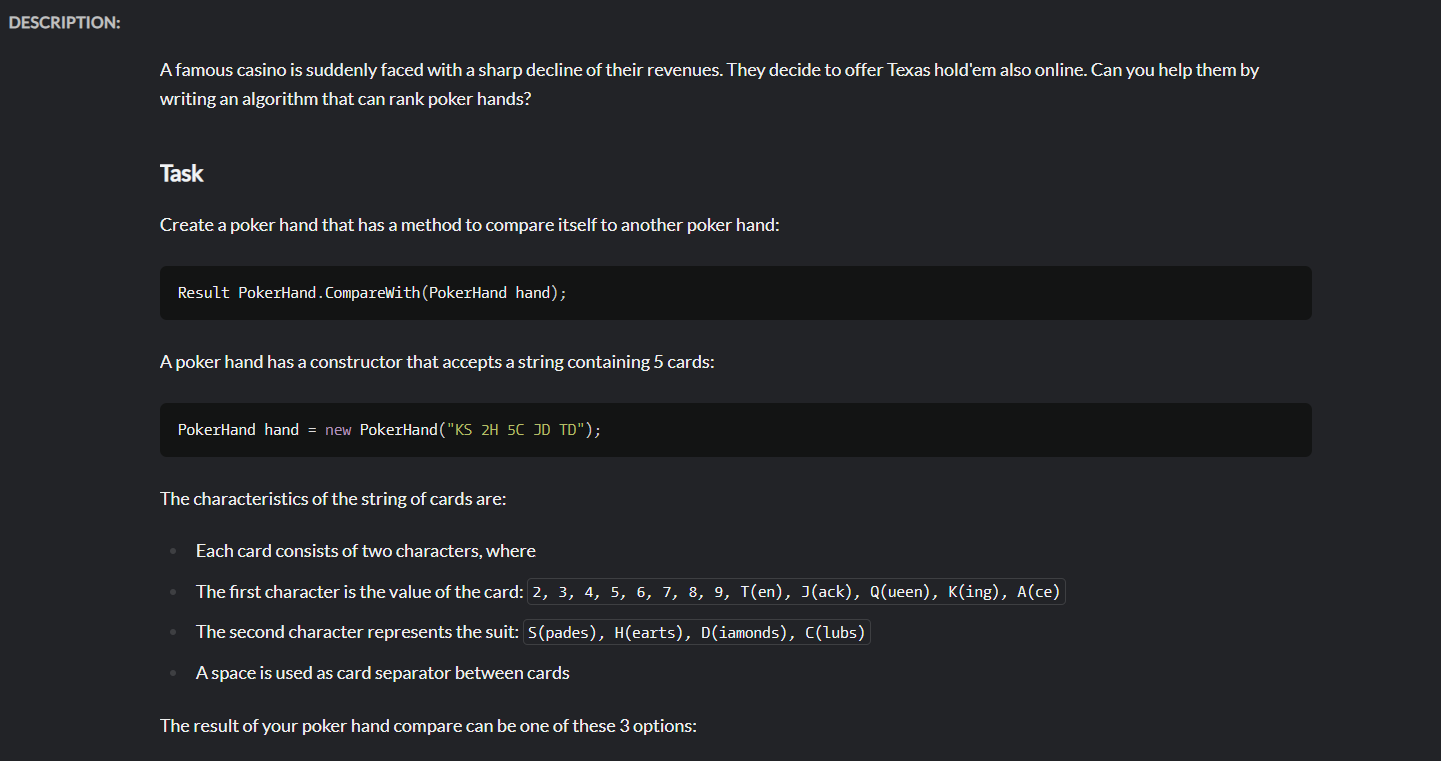

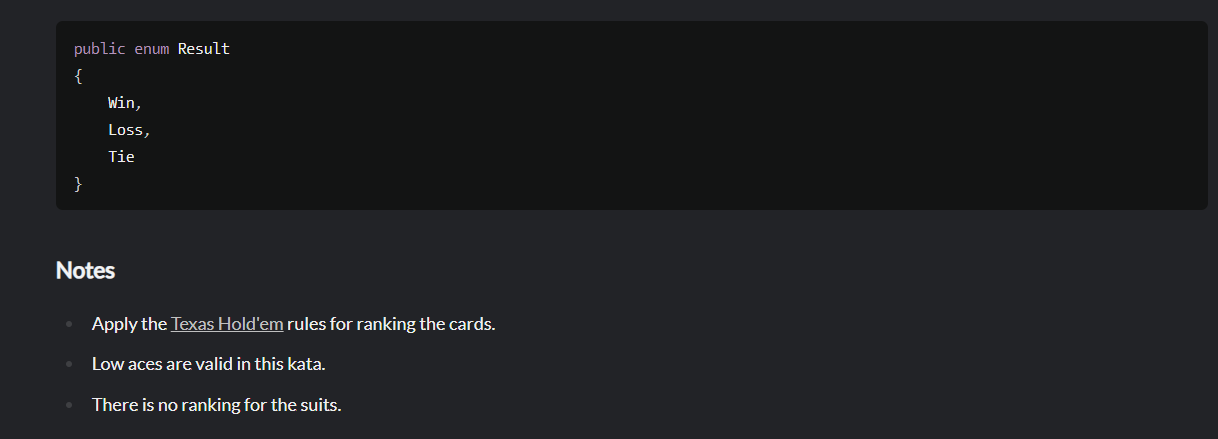

In [10]:
from collections import defaultdict
VALUE_MAPPING = {"2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "T":10, "J":11, "Q":12, "K":13, "A":14}
SUITS_MAPPING = {"S":"Spades", "H":"Hearts", "D":"Diamonds", "C":"Clubs"}
RANKING_MAPPING = {"High Card":0, "Pair":1, "Two Pair":2, "Three of a Kind":3, "Straight":4, "Flush":5,
                   "Full House":6, "Four of a Kind":7, "Straight Flush":8, "Royal Flush":9}

In [3]:
class PokerCard:
    def __init__(self, card: str):
        if len(card) != 2:
            raise ValueError("Incorrect card format")
        self.card = card
        self.value, self.suit = self.evaluate_card()

    def evaluate_card(self):
        if self.card[0] in VALUE_MAPPING and self.card[1] in SUITS_MAPPING:
            return VALUE_MAPPING[self.card[0]], SUITS_MAPPING[self.card[1]]
        raise ValueError("Incorrect card format")

In [21]:
class PokerHand:
    def __init__(self, hand: str):
        self.hand = hand
        self.cards = self.evaluate_hand()
        self.values_string, self.suits_string = self.create_helper_strings()
        self.sorted_values_string, self.occurances_string = self.sort_values_string()
        self.ranking = self.check_ranking()

    def evaluate_hand(self):
        if self.hand.count(" ") == 4 and len(self.hand) == 14:
            possible_cards = self.hand.split(" ")
            if len(possible_cards) == 5:
                return [PokerCard(card) for card in possible_cards]
        raise ValueError("Incorrect hand format")

    def create_helper_strings(self):
        values_string = ""
        suits_string = ""
        for card in self.cards:
            values_string += card.card[0]
            suits_string += card.card[1]
        return values_string, suits_string

    def create_occurances_dictionary(self):
        char_occurances = defaultdict(int)
        for char in self.values_string:
            char_occurances[char] += 1
        sorted_char_occurances = dict(sorted(char_occurances.items(), key=lambda item: (-item[1], -VALUE_MAPPING.get(item[0], -float('inf')))))
        return sorted_char_occurances

    def sort_values_string(self):
        sorted_values_string = ""
        sorted_chars = self.create_occurances_dictionary()
        occurances_string = ''.join(str(value) for value in sorted_chars.values())
        for char, number in sorted_chars.items():
            sorted_values_string += number * char
        if sorted_values_string == "A5432":
            return "5432A", occurances_string
            # sorted_values_string == "5432A"
        return sorted_values_string, occurances_string

    def is_straight(self):
        if self.sorted_values_string == "5432A":
            return True
        else:
            values = [VALUE_MAPPING[char] for char in self.sorted_values_string]
            print(values)
            return all(values[i] == values[i + 1] + 1 for i in range(len(values) - 1))

    def check_rest(self):
        is_flush = self.suits_string.count(self.suits_string[0]) == 5
        is_royal = "A" in self.sorted_values_string and "T" in self.sorted_values_string
        if not is_flush and not self.is_straight():
            return RANKING_MAPPING['High Card']
        elif not is_flush and self.is_straight():
            return RANKING_MAPPING['Straight']
        elif is_flush and not self.is_straight():
            return RANKING_MAPPING['Flush']
        elif is_flush and self.is_straight() and not is_royal:
            return RANKING_MAPPING['Straight Flush']
        elif is_flush and self.is_straight() and is_royal:
            return RANKING_MAPPING['Royal Flush']
        else:
            raise ValueError("Something went wrong while ranking hands")


    def check_ranking(self):
        if self.occurances_string == "2111":
            return RANKING_MAPPING['Pair']
        elif self.occurances_string == "221":
            return RANKING_MAPPING['Two Pair']
        elif self.occurances_string == "311":
            return RANKING_MAPPING['Three of a Kind']
        elif self.occurances_string == "32":
            return RANKING_MAPPING['Full House']
        elif self.occurances_string == "41":
            return RANKING_MAPPING['Four of a Kind']
        else:
            return self.check_rest()



In [22]:
a = PokerCard("KD")
b = PokerHand("TD QD KD JD AD")
#b = PokerHand("KD AS QS JH TH")
print(b.sorted_values_string)
print(b.occurances_string)
print(b.ranking)


[14, 13, 12, 11, 10]
[14, 13, 12, 11, 10]
[14, 13, 12, 11, 10]
AKQJT
11111
9
